# **Data Visualisation**

## Objectives

* Create visual representations of the cleaned asthma dataset to make patterns easier to understand
* Compare numeric and categorical variables visually
* Highlight relationships between features and asthma diagnosis

## Inputs

* Cleaned dataset saved at dataset/processed/asthma_cleaned.csv
* Python libraries: pandas, matplotlib, seaborn

## Outputs

* Histograms, boxplots, and scatter plots for numeric variables
* Count plots for categorical variables like Gender and Smoking
* Heatmap showing correlations between numeric variables



---

# Section 1

The below focuses on analysis of the cleaned dataset. First, the data is loaded (using pandas) from the processed CSV and inspected, providing an overview of the data and helps identify which variables to focus on.

Matplotlib is then used to create histograms for numeric values ranging from 1-10 to visualise their distributions.

Seaborn is used to generate boxplots, comparing numeric variables across BMI categories, countplots to show frequencies of categorical variables like gender and smoking status, a heatmap to visualise correlations between numeric features (using pandas to select numeric columns and calculate correlations), and a scatter plot to inspect the relationship between BMI and lung function. 

These analyses will help identify trends, potential risk factors and relationships for future statistical testing.


File loaded successfully
   Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0   63       0          1               0  15.848744        0   
1   26       1          2               2  22.757042        0   
2   57       0          2               1  18.395396        0   
3   40       1          2               1  38.515278        0   
4   61       0          0               3  19.283802        0   

   PhysicalActivity  DietQuality  SleepQuality  PollutionExposure  ...  \
0          0.894448     5.488696      8.701003           7.388481  ...   
1          5.897329     6.341014      5.153966           1.969838  ...   
2          6.739367     9.196237      6.840647           1.460593  ...   
3          1.404503     5.826532      4.253036           0.581905  ...   
4          4.604493     3.127048      9.625799           0.980875  ...   

   LungFunctionFEV1  LungFunctionFVC  Wheezing  ShortnessOfBreath  \
0          1.369051         4.941206         0                  0   
1

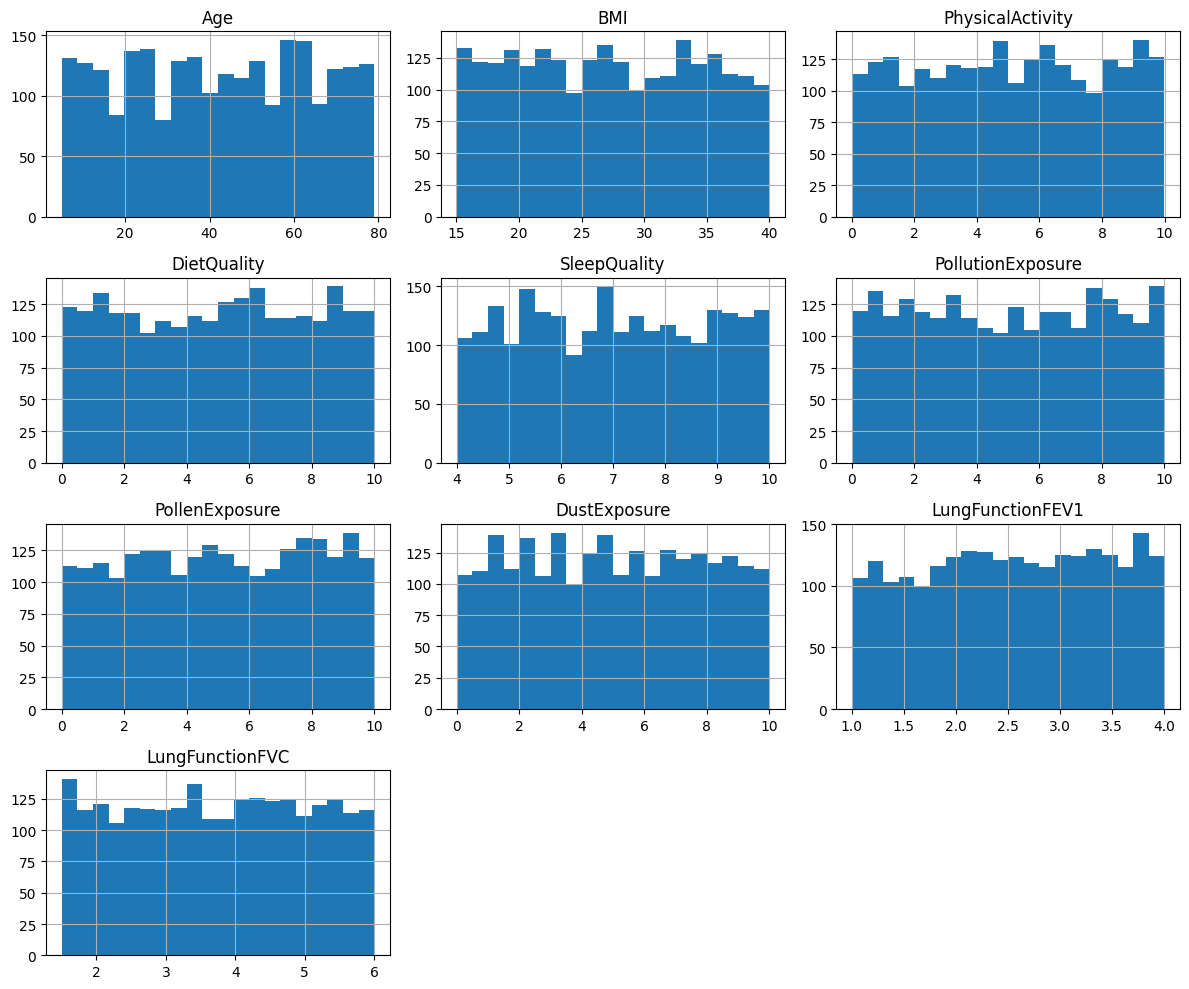

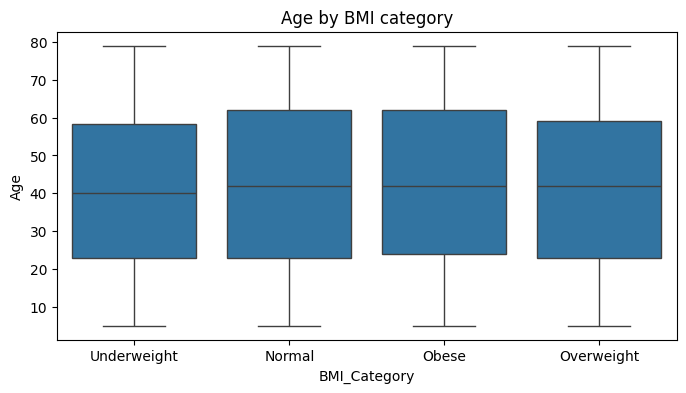

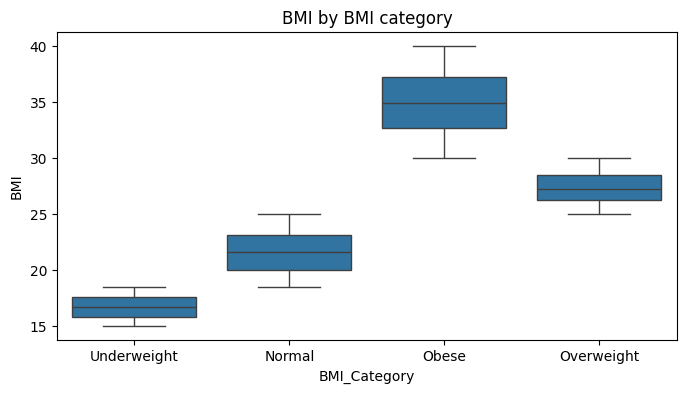

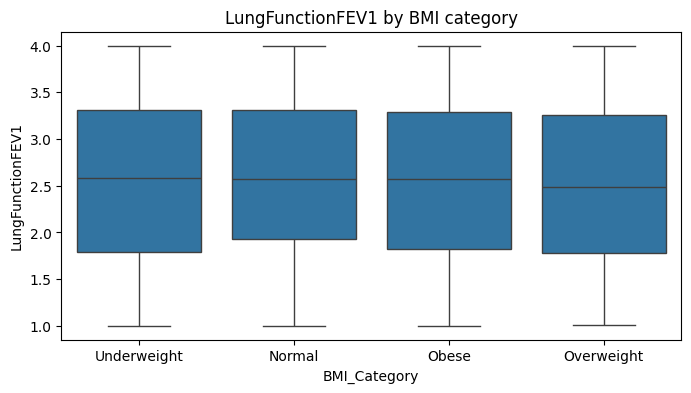

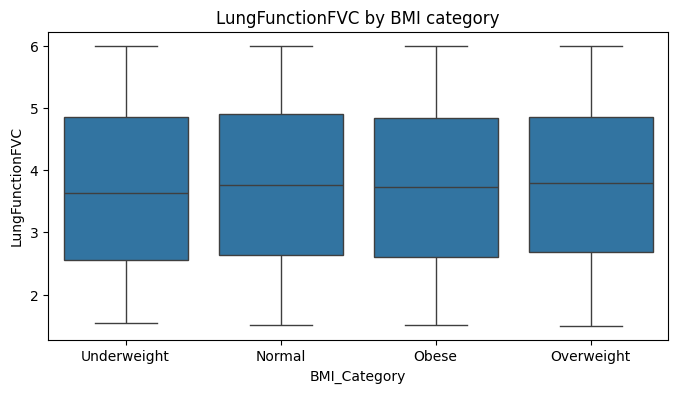

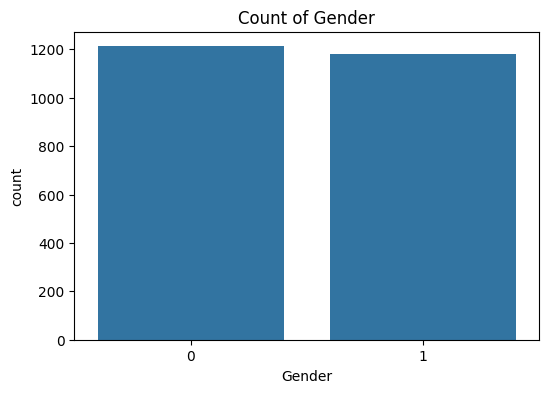

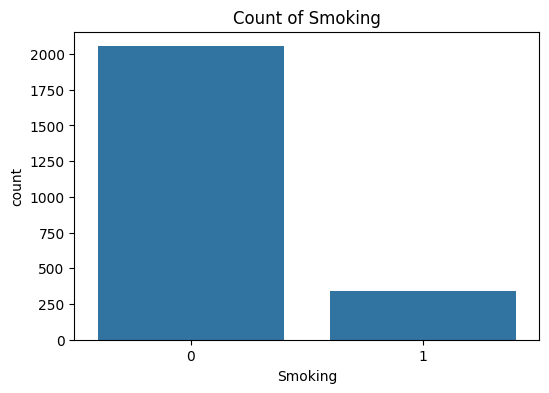

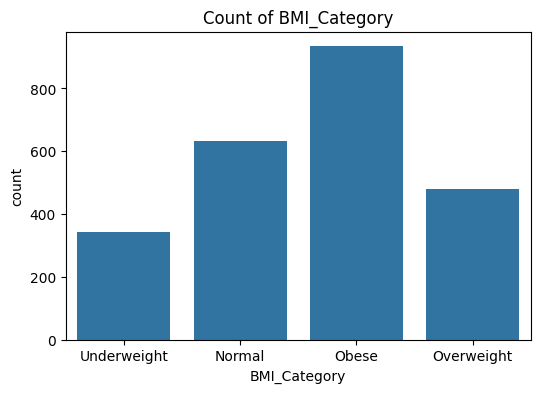

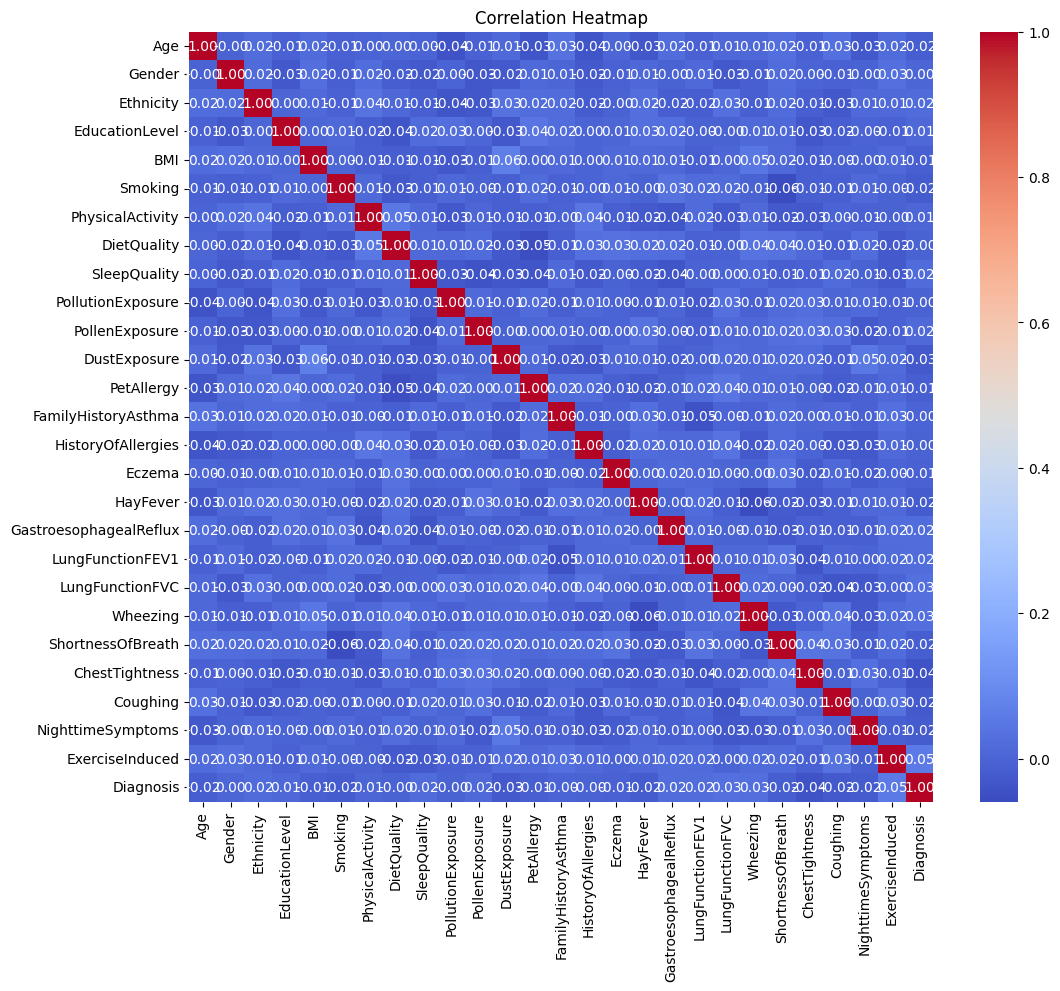

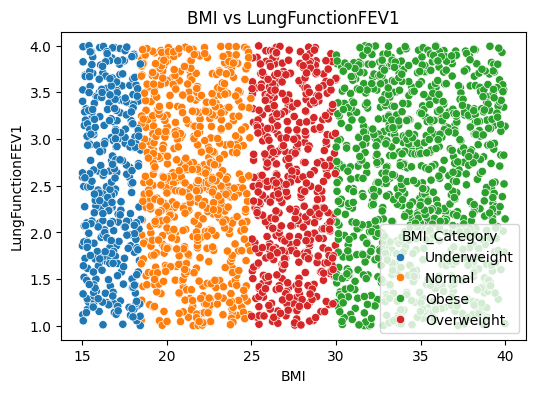

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# gets the folder where the notebook is located
current_dir = os.path.dirname(os.path.abspath("__file__"))

# builds path to dataset relative to the notebook
processed_path = os.path.join(current_dir, '..', 'dataset', 'processed', 'asthma_cleaned.csv')

# loads data
df = pd.read_csv(processed_path)
print("File loaded successfully")

# section 1 stuff
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# matplotlib - histograms for numerics out of 10
numeric_cols = ['Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 
                'PollutionExposure', 'PollenExposure', 'DustExposure', 
                'LungFunctionFEV1', 'LungFunctionFVC']

df[numeric_cols].hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

# seaborn - boxplots for numeric columns grouped by BMI_Category
for col in ['Age', 'BMI', 'LungFunctionFEV1', 'LungFunctionFVC']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='BMI_Category', y=col, data=df)
    plt.title(f'{col} by BMI category')
    plt.show()

# seaborn - countplots for categorical columns
for col in ['Gender', 'Smoking', 'BMI_Category']:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.show()

# seaborn - correlation heatmaps between numeric columns only (pandas)
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# seaborn - scatterplot for lung function vs. BMI
plt.figure(figsize=(6,4))
sns.scatterplot(x='BMI', y='LungFunctionFEV1', hue='BMI_Category', data=df)
plt.title('BMI vs LungFunctionFEV1')
plt.show()

In [ ]:
import plotly.express as px

# plotly box plot for LungFunctionFEV1 by BMI_Category
fig = px.box(df, 
             x='BMI_Category', 
             y='LungFunctionFEV1', 
             color='BMI_Category',
             points='all',  # shows individual data points
             title='Lung Function (FEV1) by BMI Category')

fig.update_layout(
    xaxis_title='BMI Category',
    yaxis_title='Lung Function FEV1',
    showlegend=False
)

fig.show()

In [8]:
fig = px.histogram(df, x='PhysicalActivity', nbins=20, color='BMI_Category',
                   title='Distribution of Physical Activity by BMI Category')
fig.show()

---

# Section 2

Graph analysis

1. Distribution analysis - histograms

* This visualisation provides a clear view of the distribution of key variables relevant to asthma research, including patient demographics, environmental factors, and lung function measurements. Understanding these distributions is the first step in building predictive models or performing statistical analysis.

* The histograms show uniform distribution across all variables—demographics, environmental factors, and lung function. This indicates the dataset is well-balanced and unbiased.

2. Age by BMI category: box plot

* This graph illustrates the distribution of Age across four distinct BMI_Category groups: 'Underweight', 'Normal', 'Obese', and 'Overweight'. Each box represents the interquartile range (IQR), while the whiskers show the full range of the data, excluding outliers. The line inside each box denotes the median age for that category.

* The analysis of the 'Age by BMI Category' box plot shows that the median age and the overall age distribution are consistent across all BMI groups. This suggests that age is not a confounding variable, as the dataset is not skewed towards a particular age group within any of the BMI categories.


3. BMI by BMI category - box plot

* This graph presents the distribution of BMI values across the four defined BMI_Category groups: 'Underweight', 'Normal', 'Obese', and 'Overweight'. Each box visualises the interquartile range (IQR), while the median is marked by the line inside the box. The whiskers indicate the spread of the data, excluding any outliers.

* The analysis of BMI by BMI category reveals that the categories are well-defined with no overlap, and the median BMI values logically increase across the categories from 'Underweight' to 'Obese'. The spread of BMI values varies, with the 'Obese' category showing the widest range, while the 'Underweight' and 'Overweight' categories have a tighter distribution.


4. LungFunctionFEV1 by BMI category - box plot

* This plot compares the distribution of LungFunctionFEV1 values across the four BMI categories.

* The distribution of LungFunctionFEV1 is consistent across all BMI categories. The median values and interquartile ranges are very similar, suggesting there is no clear correlation between a patient's BMI category and their FEV1 lung function in this dataset. This finding is useful as it indicates that BMI may not be a primary predictor of this specific lung function metric.

5. LungFunctionFVC by BMI category - box plot

* This graph shows the distribution of LungFunctionFVC values for each of the BMI categories.

* Similar to the FEV1 plot, the LungFunctionFVC values have a consistent distribution across all BMI categories. The median FVC and the spread of values are virtually identical for underweight, normal, obese, and overweight individuals. This further supports the conclusion that BMI, by itself, may not be a key factor in explaining differences in a patient's lung function within this dataset.

6. Count of gender - bar chart

* This displays the count of individuals for each gender, represented by '0' and '1'.

* The bar chart displays an almost perfect balance between genders, with an equal count of approximately 1,200 individuals for both males (0) and females (1). This is a crucial finding, as this balanced representation ensures that any models or analyses based on the data will not be biased towards a particular gender, leading to more reliable and generalizable results.

7. Count of smoking - bar chart

* This graph displays the number of individuals who smoke (1) versus those who do not (0).

* The chart shows a significant imbalance in the smoking variable. The vast majority of individuals in the dataset are non-smokers (represented by '0'), with a count of over 2,000. In contrast, the number of smokers (represented by '1') is very low, at under 500. This is a critical observation, as it indicates a class imbalance that needs to be addressed during modeling to prevent the model from becoming biased towards the dominant non-smoker group.

8. Count of BMI_Category - bar chart

* This graph presents the number of individuals in each of the four BMI categories.

* Unlike the smoking data, the BMI categories are much more evenly distributed, though not perfectly balanced. The 'Obese' category has the highest count (over 800), followed by 'Normal', 'Overweight', and 'Underweight', which has the lowest count (under 400). This distribution is more representative of a typical population and provides a good spread of data for analysis, though the class imbalance in the 'Underweight' category should be noted.

9. Correlation heatmap

* This heatmap displays the pairwise correlation coefficients between all variables in the dataset. The colour intensity and numerical value in each cell indicate the strength and direction of the correlation. Red represents a strong positive correlation, dark blue indicates a strong negative correlation, and light blue/white indicates a weak or no correlation.

* The correlation heatmap reveals that most variables in the dataset have a weak correlation with each other, which is ideal for predictive modeling as it reduces multicollinearity. Strong correlations are only present between closely related variables, such as FEV1 and FVC.

10. BMI vs LungFunctionFEV1 - scatter plot

* This visualises the relationship between BMI and LungFunctionFEV1. The data points are coloured according to their BMI_Category.

* The scatter plot of BMI vs. LungFunctionFEV1 visually confirms this weak relationship, showing no clear trend between the two variables. It also validates the correct grouping of the BMI categories while demonstrating that FEV1 values are consistently distributed across all of them, further reinforcing that BMI is not a strong predictor of lung function.

---

# Conclusion and next steps

The exploratory data analysis demonstrates that this asthma dataset is of high quality and well-prepared for advanced statistical and machine learning applications. Key demographic and environmental variables are well-balanced, with uniform distributions for age, BMI, and exposure metrics, reducing the risk of bias in downstream models. No significant correlations were observed between BMI or age and lung function metrics (FEV1 and FVC), indicating these factors are not primary predictors of lung function in this cohort. Equal gender representation further strengthens the dataset’s reliability. While the Smoking variable exhibits class imbalance, this is a manageable issue for the next phase of analysis. Overall, the dataset is clean, balanced, and ready for more complex analyses.

The next steps will focus on addressing the class imbalance in Smoking using methods such as oversampling, undersampling, or algorithms designed for imbalanced data like SMOTE. Feature engineering will be applied to uncover more complex relationships, including creating composite variables such as an “environmental risk score” based on pollution, pollen, and dust exposure. With the dataset prepared, predictive modeling can commence, aiming to forecast outcomes such as Diagnosis or LungFunctionFEV1 and identify the most significant predictors of asthma and lung health. These steps will ensure reliable and insightful analysis of the dataset.